<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [1]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [8]:
X_train[5].shape # 1 channel

(28, 28)

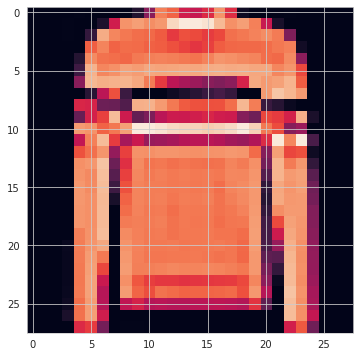

In [9]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train.shape

(60000,)

In [12]:
# view the unique values and frequencies of classes in y_train
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [13]:
# define the classes
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
classes[int(y_train[0])]

'Ankle boot'

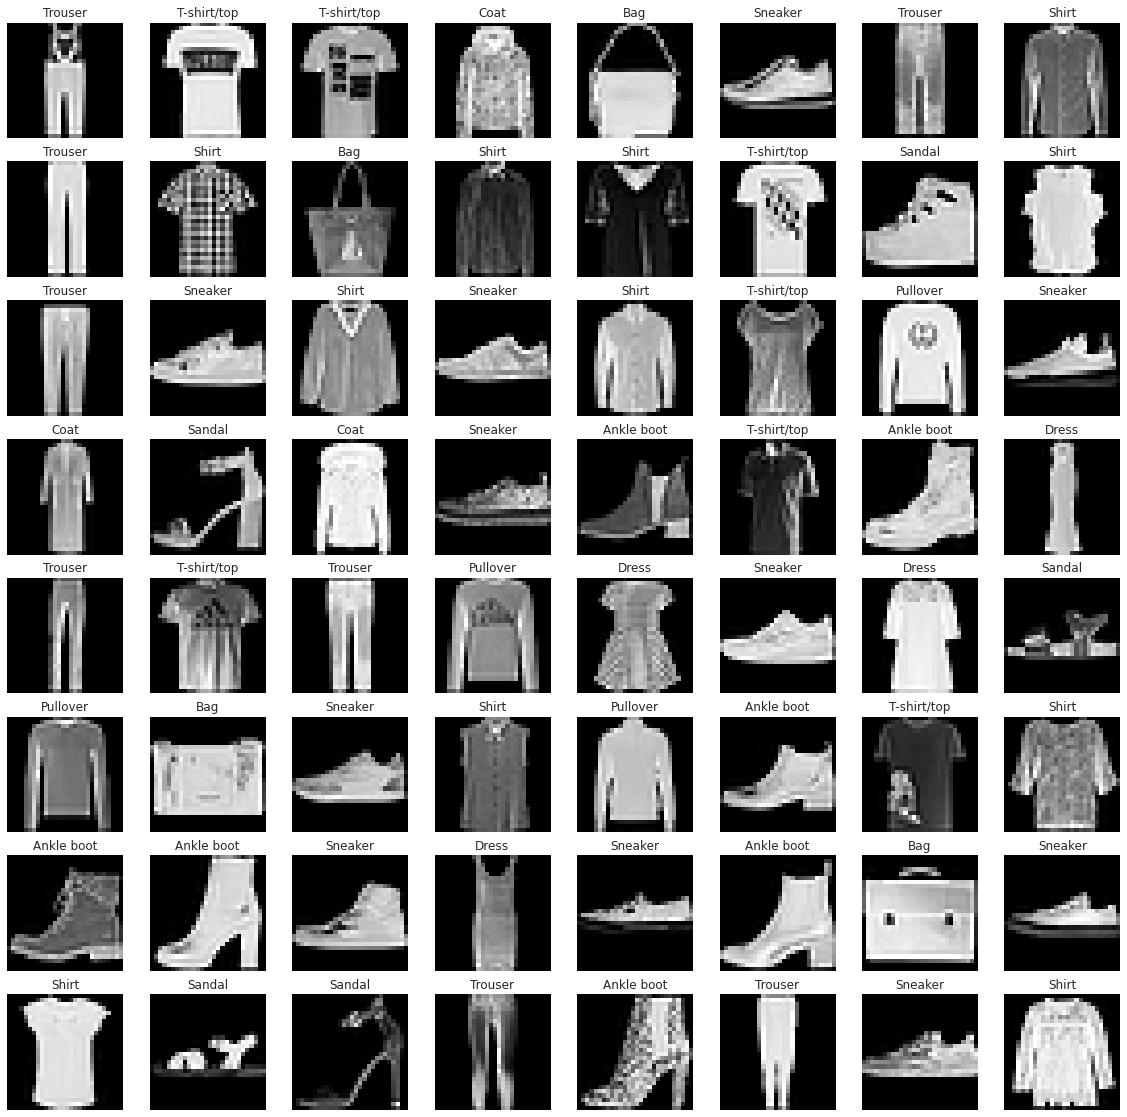

In [15]:
# The random 64 images in y_train
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index], cmap="gray")

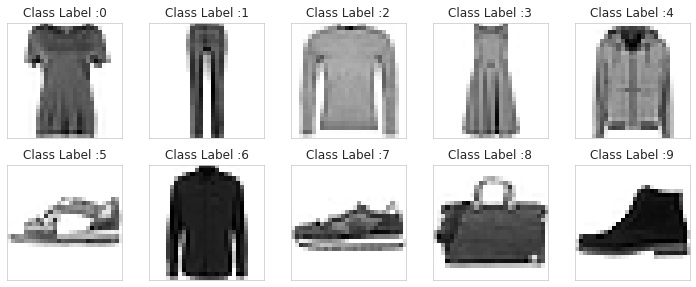

In [16]:
# a random image from each class
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[y_train == i][3],  cmap=plt.cm.binary)
  plt.title(f"Class Label :{i}")
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.tight_layout()


# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
X_train[5].min() 

0

In [18]:
X_train[5].max()

255

In [19]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[9].min()

0.0

In [21]:
X_train[9].max()

1.0

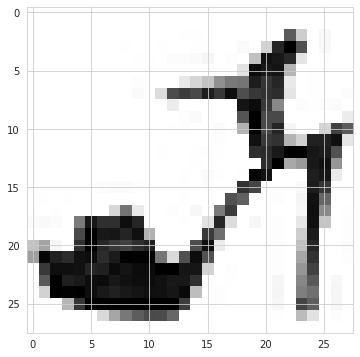

In [22]:
plt.imshow(X_train[9],cmap=plt.cm.binary);

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [23]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [25]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [26]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [29]:
Y_train[12]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
Y_train  # is a matrix

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# pd.DataFrame(Y_train).iloc[np.where(pd.DataFrame(Y_train).duplicated() == False)].index

Int64Index([0, 1, 3, 5, 6, 8, 16, 18, 19, 23], dtype='int64')

In [ ]:
# pd.DataFrame(y_train).iloc[np.where(pd.DataFrame(y_train).duplicated() == False)].index

Int64Index([0, 1, 3, 5, 6, 8, 16, 18, 19, 23], dtype='int64')

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPool2D, Flatten, Dense,Dropout

In [ ]:
image_shape = X_train[0].shape

## Modelling-1

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=image_shape, activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model1.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
model1.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', 'Recall', 'AUC', tf.keras.metrics.PrecisionAtRecall(recall=0.8)])

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 20, 20, 64)        32832     
                                                                 
 conv2d_13 (Conv2D)          (None, 17, 17, 128)       131200    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)       

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights = True)

In [ ]:
model1.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop]) 


Epoch 1/50
1875/1875 [==============================] - 767s 408ms/step - loss: 0.5405 - accuracy: 0.8034 - recall: 0.7510 - auc: 0.9820 - precision_at_recall_2: 0.8193 - val_loss: 0.3801 - val_accuracy: 0.8689 - val_recall: 0.8309 - val_auc: 0.9912 - val_precision_at_recall_2: 0.9284
Epoch 2/50
1875/1875 [==============================] - 734s 391ms/step - loss: 0.3540 - accuracy: 0.8747 - recall: 0.8530 - auc: 0.9909 - precision_at_recall_2: 0.9321 - val_loss: 0.3713 - val_accuracy: 0.8698 - val_recall: 0.8518 - val_auc: 0.9904 - val_precision_at_recall_2: 0.9273
Epoch 3/50
1875/1875 [==============================] - 740s 395ms/step - loss: 0.3392 - accuracy: 0.8823 - recall: 0.8624 - auc: 0.9913 - precision_at_recall_2: 0.9411 - val_loss: 0.3605 - val_accuracy: 0.8697 - val_recall: 0.8373 - val_auc: 0.9914 - val_precision_at_recall_2: 0.9284
Epoch 4/50
1875/1875 [==============================] - 742s 396ms/step - loss: 0.3438 - accuracy: 0.8832 - recall: 0.8622 - auc: 0.9912 - pre

In [ ]:
# save model permanently and check
model1.save('/content/drive/MyDrive/fashion_mnist1.h5')

**TASK 7: Plot values of metrics you used in your model.**

In [ ]:
model1.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall_2']

In [ ]:
summary = pd.DataFrame(model1.history.history)
summary.tail()

,loss,accuracy,recall,auc,precision_at_recall_2,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_2
2,0.339,0.882,0.862,0.991,0.941,0.361,0.870,0.837,0.991,0.928
3,0.344,0.883,0.862,0.991,0.942,0.443,0.866,0.834,0.987,0.919
4,0.370,0.882,0.861,0.991,0.940,0.405,0.875,0.846,0.990,0.929
5,0.374,0.877,0.855,0.990,0.935,0.441,0.869,0.860,0.986,0.926
6,0.404,0.871,0.845,0.989,0.927,0.458,0.845,0.820,0.986,0.880


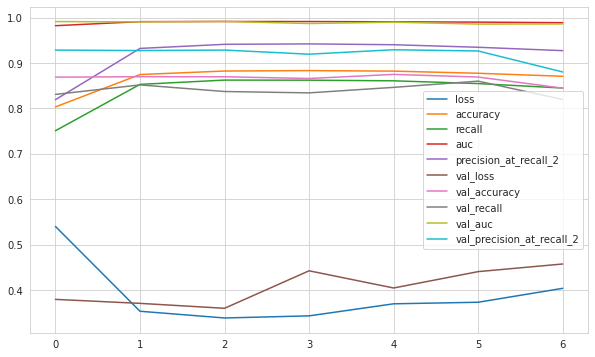

In [ ]:
summary.plot();

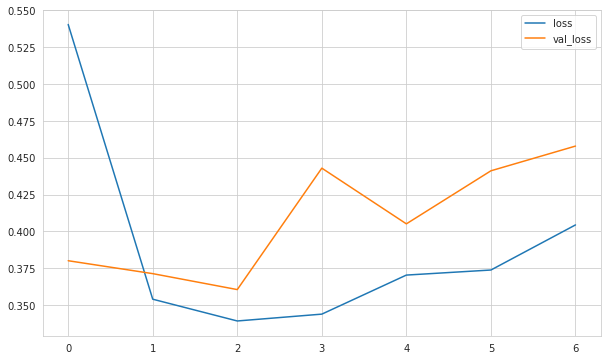

In [ ]:
summary[["loss", "val_loss"]].plot();

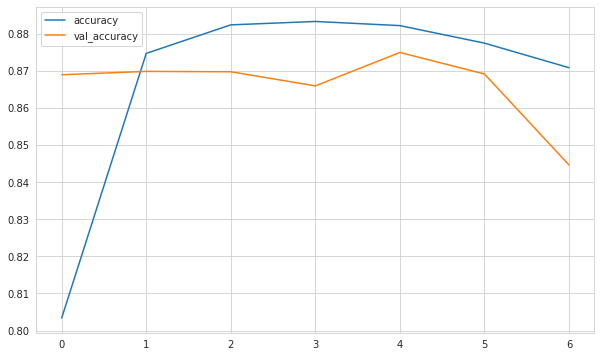

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [ ]:
model1.evaluate(X_test,Y_test)

313/313 [==============================] - 28s 89ms/step - loss: 0.3605 - accuracy: 0.8697 - recall: 0.8373 - auc: 0.9914 - precision_at_recall_2: 0.9284


[0.3605015277862549,
 0.869700014591217,
 0.8373000025749207,
 0.9913507699966431,
 0.9284473657608032]

In [ ]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3605015277862549
Test accuracy: 0.869700014591217


In [ ]:
pred_prob = model1.predict(X_test)
pred_prob

array([[1.2785351e-06, 1.7526898e-11, 4.1702418e-07, ..., 1.5460381e-02,
        4.4003966e-05, 9.8039836e-01],
       [1.5811650e-04, 3.8786652e-08, 7.7024418e-01, ..., 3.1483440e-12,
        3.6800317e-05, 3.4330576e-08],
       [1.4442775e-26, 1.0000000e+00, 5.1066478e-29, ..., 4.3269847e-29,
        7.4395947e-31, 0.0000000e+00],
       ...,
       [3.3645407e-05, 7.1053970e-13, 2.4022069e-09, ..., 6.5100601e-14,
        9.9996567e-01, 9.0006006e-17],
       [4.4749561e-16, 1.0000000e+00, 9.5727865e-19, ..., 1.0810200e-20,
        1.4753495e-19, 5.7393248e-29],
       [3.7825631e-03, 9.0049662e-06, 2.3213483e-04, ..., 4.5100924e-02,
        1.6176033e-01, 1.8758496e-03]], dtype=float32)

In [ ]:
pred_prob.shape

(10000, 10)

In [ ]:
pred_prob[0]

array([1.2785351e-06, 1.7526898e-11, 4.1702418e-07, 5.4866514e-06,
       1.3584779e-06, 4.0882924e-03, 3.6014558e-07, 1.5460381e-02,
       4.4003966e-05, 9.8039836e-01], dtype=float32)

In [ ]:
np.argmax(pred_prob[0])

9

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_pred.shape

(10000,)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1000
           1       0.97      0.98      0.98      1000
           2       0.83      0.76      0.80      1000
           3       0.85      0.91      0.88      1000
           4       0.75      0.83      0.79      1000
           5       0.98      0.94      0.96      1000
           6       0.71      0.53      0.61      1000
           7       0.92      0.97      0.94      1000
           8       0.92      0.97      0.95      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[886   2  14  33   3   0  46   0  16   0]
 [  2 978   0  11   6   0   1   0   2   0]
 [ 11   1 764   9 128   0  78   0   9   0]
 [ 16  15   7 911  28   0  22   0   1   0]
 [  2   1  51  57 832   0  53   0   4   0]
 [  6   4   3   4   0 936   1  25  14   7]
 [237   3  73  36 100   0 528   0  23   0]
 [  0   0   0   0   0  15   0 969   8   8]
 [  3   1   3   8   6   1   9   2 967   0]
 [  0   0   1   1   3   3   1  63   2 926]]


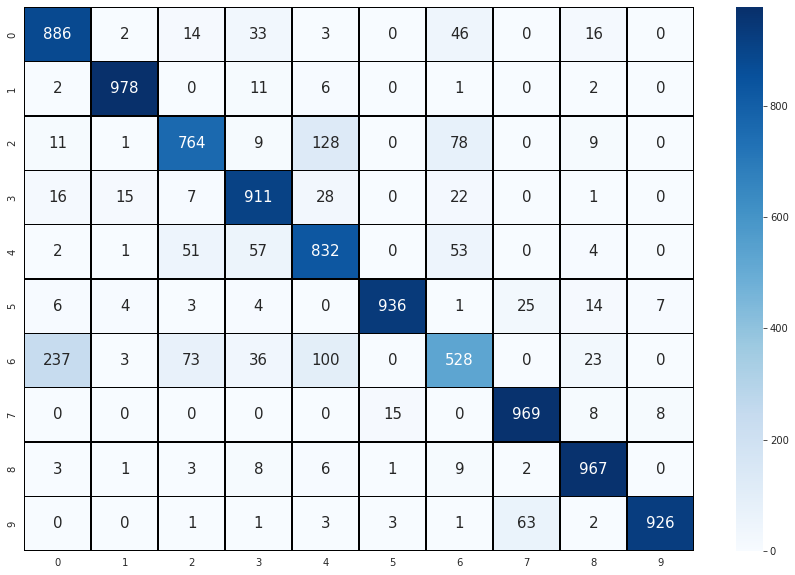

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [ ]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
(y_test != y_pred).sum()  

1303

## Modelling-2

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model2 = Sequential()

model2.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model2.add(Dropout(0.2))

# model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
# model2.add(BatchNormalization())
# model2.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
# model2.add(Dropout(0.2))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'Recall', 'AUC', tf.keras.metrics.PrecisionAtRecall(recall=0.8)])

In [ ]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_22 (Bat  (None, 26, 26, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 13, 13, 128)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 256)       295168    
                                                                 
 batch_normalization_23 (Bat  (None, 11, 11, 256)    

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True)

In [ ]:
model2.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop]) 


Epoch 1/50
1875/1875 [==============================] - 641s 341ms/step - loss: 0.7004 - accuracy: 0.7465 - recall: 0.6625 - auc: 0.9712 - precision_at_recall_6: 0.6918 - val_loss: 0.4388 - val_accuracy: 0.8305 - val_recall: 0.7906 - val_auc: 0.9878 - val_precision_at_recall_6: 0.8669
Epoch 2/50
1875/1875 [==============================] - 611s 326ms/step - loss: 0.4485 - accuracy: 0.8418 - recall: 0.7983 - auc: 0.9868 - precision_at_recall_6: 0.8808 - val_loss: 0.3654 - val_accuracy: 0.8656 - val_recall: 0.8463 - val_auc: 0.9906 - val_precision_at_recall_6: 0.9205
Epoch 3/50
1875/1875 [==============================] - 605s 323ms/step - loss: 0.3864 - accuracy: 0.8626 - recall: 0.8302 - auc: 0.9900 - precision_at_recall_6: 0.9178 - val_loss: 0.3200 - val_accuracy: 0.8847 - val_recall: 0.8595 - val_auc: 0.9927 - val_precision_at_recall_6: 0.9467
Epoch 4/50
1875/1875 [==============================] - 604s 322ms/step - loss: 0.3561 - accuracy: 0.8743 - recall: 0.8439 - auc: 0.9910 - pre

In [ ]:
# save model permanently and check
model2.save('/content/drive/MyDrive/fashion_mnist1_model_2.h5')

In [ ]:
model2.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall_6']

In [ ]:
summary = pd.DataFrame(model2.history.history)
summary.tail()

,loss,accuracy,recall,auc,precision_at_recall_6,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_6
27,0.187,0.933,0.924,0.997,0.988,0.234,0.919,0.912,0.995,0.980
28,0.184,0.935,0.925,0.997,0.989,0.240,0.917,0.912,0.994,0.983
29,0.180,0.936,0.927,0.997,0.989,0.255,0.916,0.910,0.993,0.978
30,0.178,0.936,0.927,0.997,0.989,0.229,0.924,0.918,0.995,0.982
31,0.174,0.939,0.930,0.997,0.990,0.280,0.911,0.906,0.992,0.974


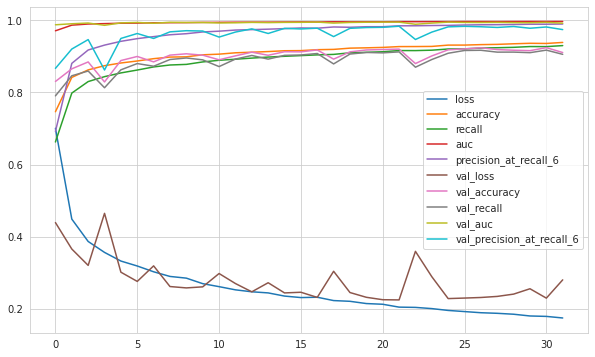

In [ ]:
summary.plot();

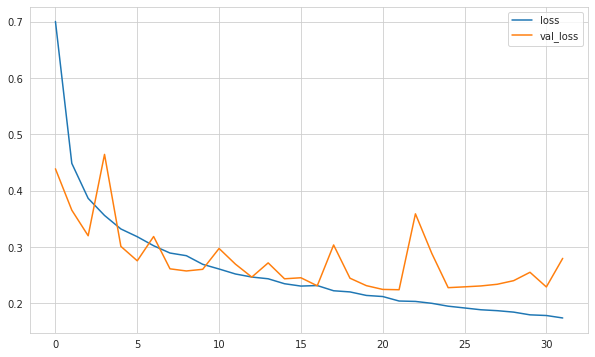

In [ ]:
summary[["loss", "val_loss"]].plot();

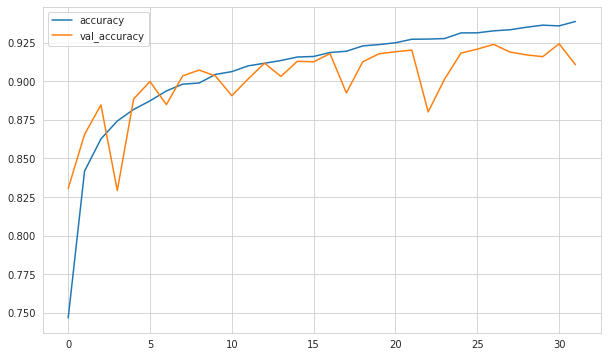

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation for Modelling-2

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [ ]:
model2.evaluate(X_test,Y_test)

313/313 [==============================] - 22s 71ms/step - loss: 0.2242 - accuracy: 0.9203 - recall: 0.9126 - auc: 0.9951 - precision_at_recall_6: 0.9838


[0.22419577836990356,
 0.9203000068664551,
 0.9125999808311462,
 0.9951488971710205,
 0.983771800994873]

In [ ]:
313/313 [==============================] - 28s 89ms/step - loss: 0.3605 - accuracy: 0.8697 - recall: 0.8373 - auc: 0.9914 - precision_at_recall_2: 0.9284
[0.3605015277862549,
 0.869700014591217,
 0.8373000025749207,
 0.9913507699966431,
 0.9284473657608032]

In [ ]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22419577836990356
Test accuracy: 0.9203000068664551


In [ ]:
pred_prob = model2.predict(X_test)
pred_prob

array([[2.0853740e-19, 3.6521625e-27, 9.0863076e-20, ..., 7.5673233e-07,
        2.1933781e-20, 9.9999928e-01],
       [2.0693151e-06, 2.1141858e-15, 9.9985623e-01, ..., 2.7307653e-24,
        5.8638888e-12, 1.7571357e-20],
       [4.7797158e-14, 1.0000000e+00, 8.9720881e-15, ..., 1.1578728e-28,
        1.1716945e-15, 2.1464834e-25],
       ...,
       [4.2325976e-11, 1.0861276e-15, 1.4971890e-11, ..., 2.5806860e-15,
        1.0000000e+00, 1.4164024e-18],
       [4.9422337e-13, 1.0000000e+00, 7.4832359e-14, ..., 3.3174171e-26,
        1.7068171e-14, 6.9538568e-23],
       [2.3048936e-07, 1.3850781e-12, 3.3329426e-09, ..., 1.2897885e-02,
        4.1169264e-07, 1.8935361e-05]], dtype=float32)

In [ ]:
pred_prob.shape

(10000, 10)

In [ ]:
pred_prob[0]

array([2.0853740e-19, 3.6521625e-27, 9.0863076e-20, 1.0356794e-20,
       1.8703436e-20, 1.0079455e-09, 2.6019997e-20, 7.5673233e-07,
       2.1933781e-20, 9.9999928e-01], dtype=float32)

In [ ]:
np.argmax(pred_prob[0])

9

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_pred.shape

(10000,)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.89      0.88      1000
           3       0.92      0.92      0.92      1000
           4       0.85      0.91      0.88      1000
           5       0.98      0.99      0.99      1000
           6       0.77      0.74      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[854   2  13  18   3   2 102   0   6   0]
 [  1 984   0   9   2   0   2   0   2   0]
 [ 18   0 885   7  48   0  41   0   1   0]
 [  5   2  11 923  32   0  25   0   2   0]
 [  1   0  26  18 909   0  43   0   3   0]
 [  0   0   0   0   0 992   0   6   0   2]
 [ 85   4  68  24  75   0 738   0   6   0]
 [  0   0   0   0   0  11   0 977   0  12]
 [  2   0   0   3   2   2   3   2 985   1]
 [  0   0   0   0   0   4   0  40   0 956]]


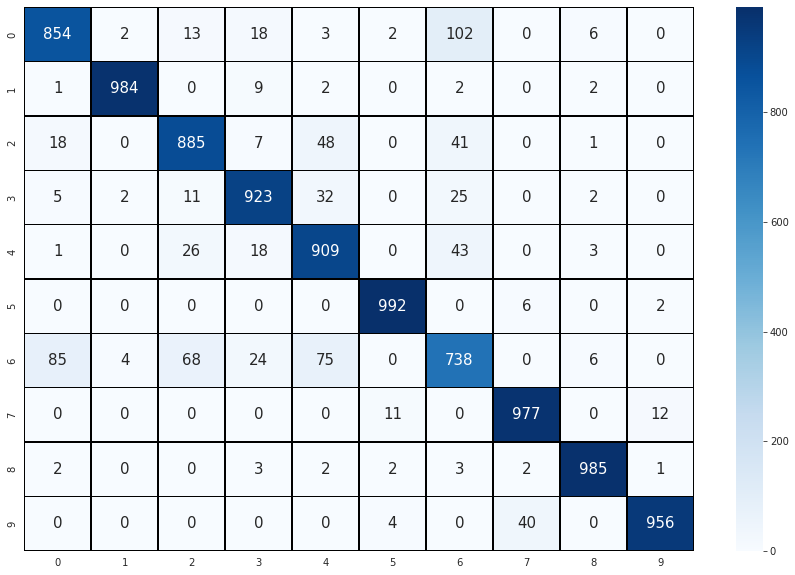

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [ ]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
(y_test != y_pred).sum()  

797

## Prediction for Model 1

In [ ]:
prediction = X_test[3]

In [ ]:
prediction.shape

(28, 28, 1)

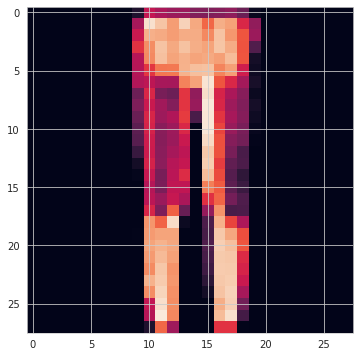

In [ ]:
plt.imshow(prediction.reshape(28,28));  # resim gray-level dır. 

In [ ]:
pred_prob = model1.predict(prediction.reshape(1,28,28,1))  # 1 adet 28x 28 formatında 1 kanallı resim. (1 channel, rgb değil.)
pred_prob

array([[1.8047298e-25, 1.0000000e+00, 2.0585890e-27, 5.7856017e-20,
        7.4625172e-20, 6.1719315e-36, 1.0580663e-21, 1.6874938e-27,
        6.9536429e-31, 0.0000000e+00]], dtype=float32)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

# Using

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/fashion_mnist1.h5')

In [ ]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))

In [ ]:
np.argmax(pred)

1

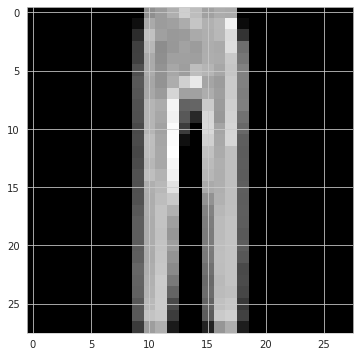

In [ ]:
plt.imshow(X_test[24].reshape(28,28), cmap="gray")

## Prediction for Model 2

In [ ]:
prediction = X_test[3]

In [ ]:
prediction.shape

(28, 28, 1)

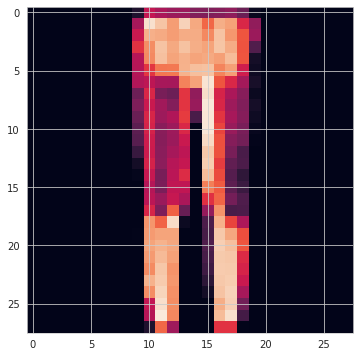

In [ ]:
plt.imshow(prediction.reshape(28,28));  # resim gray-level dır. 

In [ ]:
pred_prob = model2.predict(prediction.reshape(1,28,28,1))  # 1 adet 28x 28 formatında 1 kanallı resim. (1 channel, rgb değil.)
pred_prob

array([[1.5550065e-13, 1.0000000e+00, 1.5265821e-14, 1.9426873e-11,
        6.3186820e-13, 4.3650528e-20, 1.2232013e-11, 1.5917557e-27,
        7.2746383e-15, 5.8763858e-24]], dtype=float32)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

# Using

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/fashion_mnist1_model_2.h5')

In [ ]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))

In [ ]:
np.argmax(pred)

1

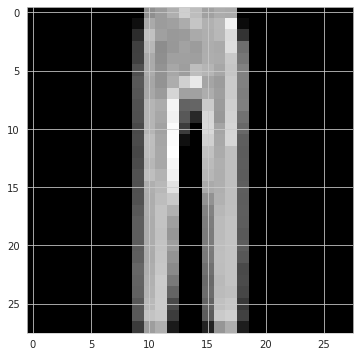

In [ ]:
plt.imshow(X_test[24].reshape(28,28), cmap="gray")